
<div style="text-align: center; color: white; background-color: #559cff; font-weight: bold; padding: 20px" >
 <p style="font-size: 40px"> Lab 3 - Data Visualization 📊</p>
 <p style="font-size: 30px"><u>Topic: Iris Species</u> 🌼</p>

</div>


---

## Thông tin nhóm 👬
| Họ tên              |MSSV       |
|-------------------|----------|
| Nguyễn Khánh Nhân | 21127657         |
| Huỳnh Sỉ Kha | 21127734         |
| Đoàn Nam Thắng     | 21127740 |

## Mức độ đóng góp

| Họ tên              | Tỉ lệ đóng góp       |
|-------------------|----------------------|
| Nguyễn Khánh Nhân | 100%         |
| Huỳnh Sỉ Kha | 100%         |
| Đoàn Nam Thắng     | 100%         |

## Mục lục 📑



---

## 1. Các thư viện sử dụng 📚

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

## 2. Load dữ liệu 📂

In [2]:
df = pd.read_csv('../data/Iris.csv')
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
94,95,5.6,2.7,4.2,1.3,Iris-versicolor
10,11,5.4,3.7,1.5,0.2,Iris-setosa
90,91,5.5,2.6,4.4,1.2,Iris-versicolor
78,79,6.0,2.9,4.5,1.5,Iris-versicolor
82,83,5.8,2.7,3.9,1.2,Iris-versicolor


## 3. Một số thông tin cơ bản về dữ liệu 📝

- Ý nghĩa mỗi dòng trong dữ liệu: mỗi dòng trong dữ liệu đại diện cho thông tin của một loài hoa Iris.

- Ý nghĩa các cột dữ liệu:

|Tên cột|Ý nghĩa|
|-------|-------|
|Id| Số thứ tự của dòng dữ liệu|
|SepalLengthCm| Độ dài của đài hoa theo cm|
|SepalWidthCm| Độ rộng của đài hoa theo cm|
|PetalLengthCm| Độ dài của cánh hoa theo cm|
|PetalWidthCm| Độ rộng của cánh hoa theo cm|
|Species| Loài hoa|

- Kích thước tập dữ liệu

In [3]:
rows, cols = df.shape
print(f'Số lượng dòng trong tập dữ liệu: {rows}')
print(f'Số lượng cột trong tập dữ liệu: {cols}')

Số lượng dòng trong tập dữ liệu: 150
Số lượng cột trong tập dữ liệu: 6


## 4. Làm sạch dữ liệu 🧹

- Kiểm tra số dòng dữ liệu bị lặp

In [4]:
print(f"Dữ liệu có {df.duplicated().sum()} dòng bị trùng.")

Dữ liệu có 0 dòng bị trùng.


- Kiểm tra các cột có giá trị thiếu

In [5]:
df.isnull().sum().sort_values(ascending=False)

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

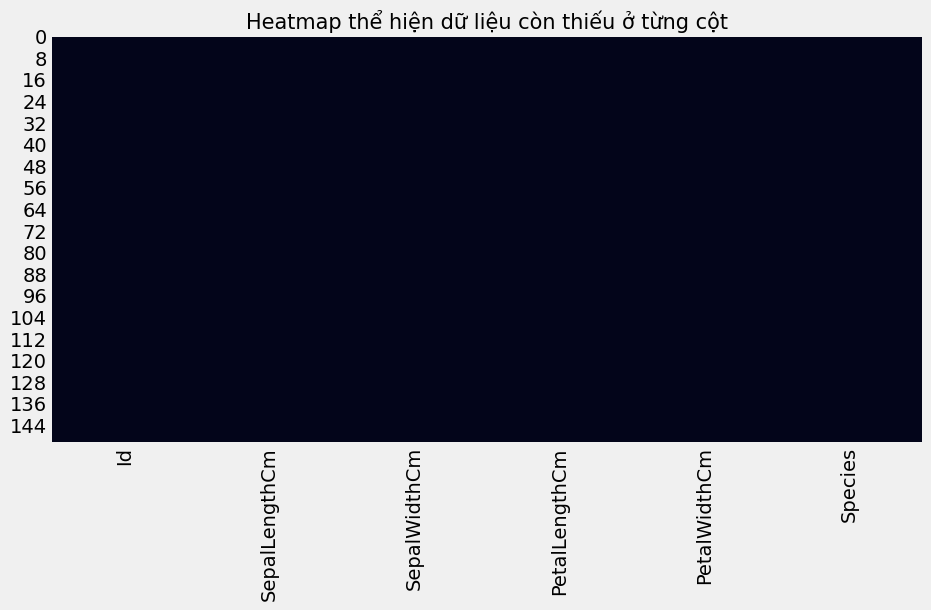

In [6]:
fig, axe = plt.subplots(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, ax=axe)
plt.title('Heatmap thể hiện dữ liệu còn thiếu ở từng cột', fontsize=15)
plt.show()

- Kiểm tra tính đúng đắn của dữ liệu trong từng cột `ID`

In [7]:
df['Id'].nunique()

150

- Kiểm tra tính đúng đắn của các giá trị trong các cột: `SepalLengthCm`, `SepalWidthCm`, `PetalLengthCm`, `PetalWidthCm`.

In [8]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for col in cols:
    if df[col].apply(lambda x: isinstance(x, float)).all():
        print(f"Các giá trị trong cột {col} đều có kiểu dữ liệu dạng số thực")
    else:
        print(f"Có tồn tại giá trị trong cột {col} không có kiểu dữ liệu dạng số thực")

Các giá trị trong cột SepalLengthCm đều có kiểu dữ liệu dạng số thực
Các giá trị trong cột SepalWidthCm đều có kiểu dữ liệu dạng số thực
Các giá trị trong cột PetalLengthCm đều có kiểu dữ liệu dạng số thực
Các giá trị trong cột PetalWidthCm đều có kiểu dữ liệu dạng số thực


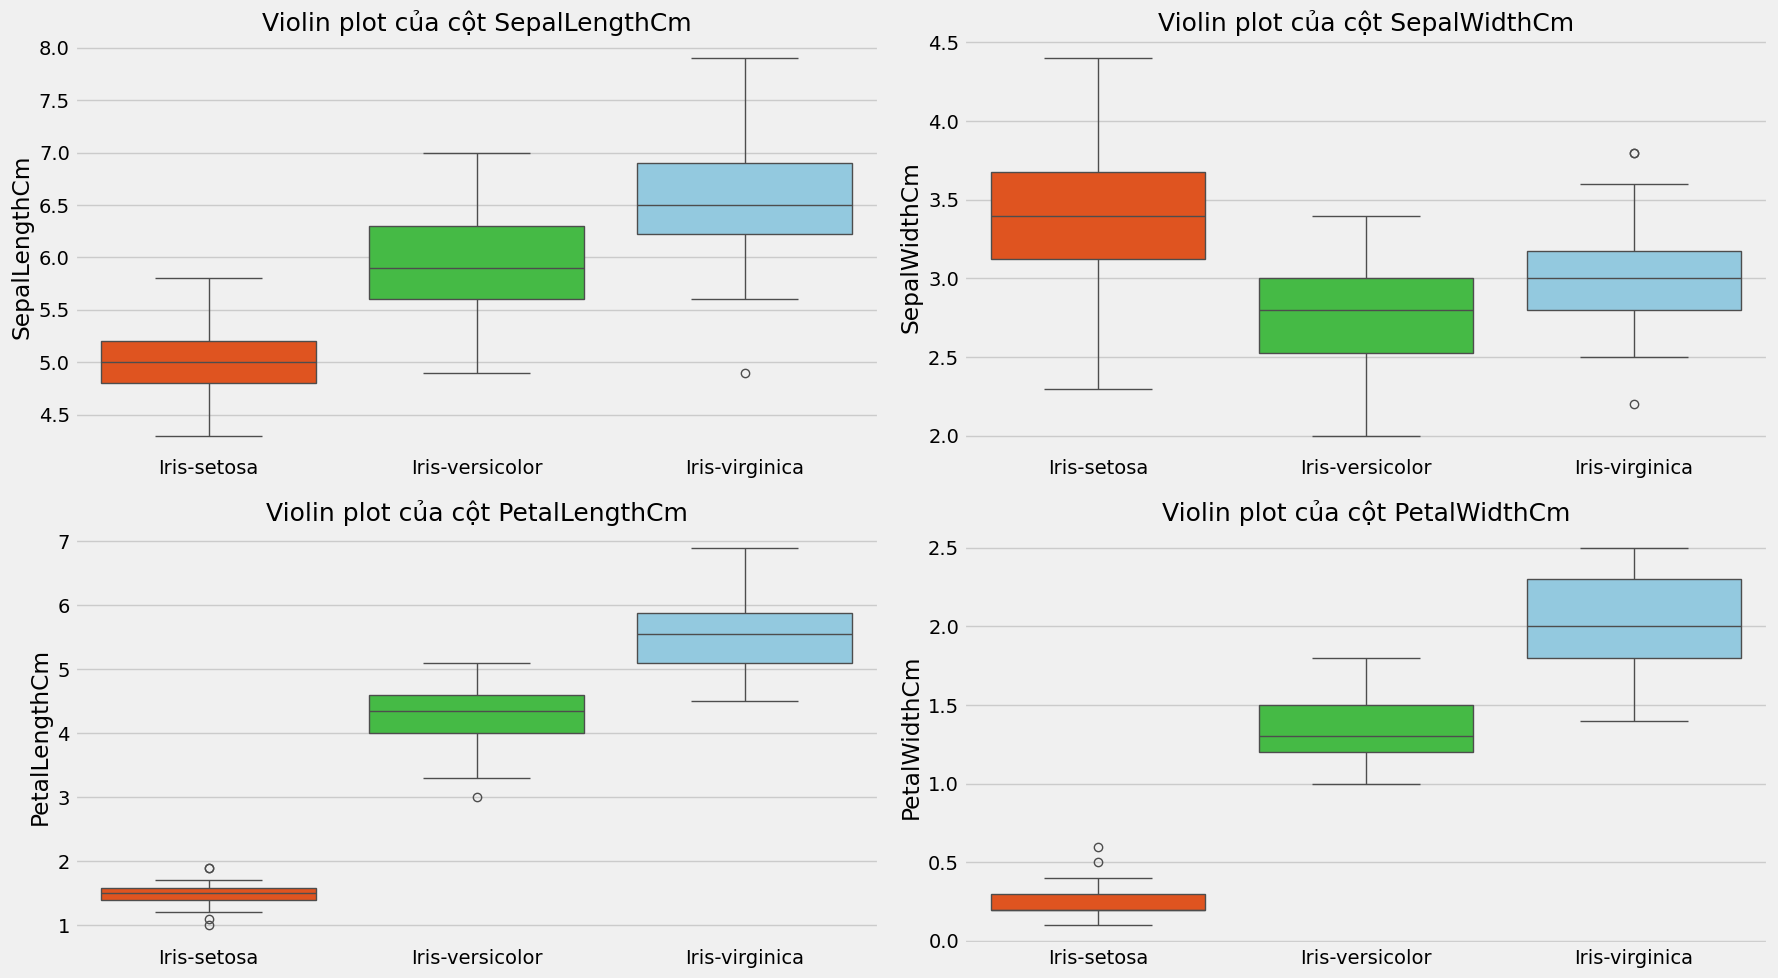

In [9]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
custom_palette = {'Iris-setosa': 'orangered', 'Iris-versicolor': 'limegreen', 'Iris-virginica': 'skyblue'}

for col, axe in zip(cols, axes.flatten()):
    sns.boxplot(data=df, x='Species', y=col, ax=axe, hue='Species', palette=custom_palette)
    axe.set_title(f'Violin plot của cột {col}', fontsize=18)
    axe.set_ylabel(col)
    axe.set_xlabel('')
    
plt.tight_layout()
plt.show()


- Kiểm tra tính đúng đắn của dữ liệu trong cột `Species`.

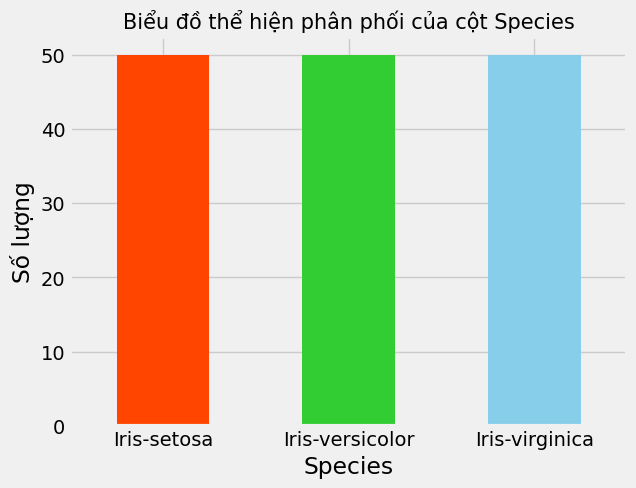

In [10]:
df['Species'].value_counts().plot(kind='bar', color=['orangered', 'limegreen', 'skyblue'])
plt.title('Biểu đồ thể hiện phân phối của cột Species', fontsize=15)
plt.xlabel('Species')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.show()

Nhận xét:
- Như vậy dữ liệu không có dòng dữ liệu nào bị lặp và không có cột nào chứa giá trị rỗng.
- Dữ liệu trong các cột `SepalLengthCm`, `SepalWidthCm`, `PetalLengthCm`, `PetalWidthCm` đều là dạng số thực. Dựa vào `box plot` ta thấy không có quá nhiều giá trị bất thường (outlier) trong các cột này nên ta có thể chấp nhận được và không cần phải xử lí hoặc loại bỏ chúng.
- Cột `Species` có dạng categorical với đúng 3 giá trị: `Iris-setosa`, `Iris-versicolor`, `Iris-virginica`.
- Cột `ID` chỉ đại diện cho số thứ tự của dòng dữ liệu nên không cần thiết cho việc phân tích dữ liệu, vì vậy ta sẽ thực hiện loại bỏ cột này.

In [11]:
df.drop('Id', axis=1, inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 5. Thống kê dữ liệu 📊

Vì dữ liệu của ta có các cột đều thuộc dạng numeric (ngoại trừ cột `Species`) nên ở phần này ta sẽ xem xét một số thông tin thống kê cơ bản của các cột dữ liệu để từ đó có cái nhìn tổng quan về dữ liệu.

#### 5.1 Các cột `Numeric`

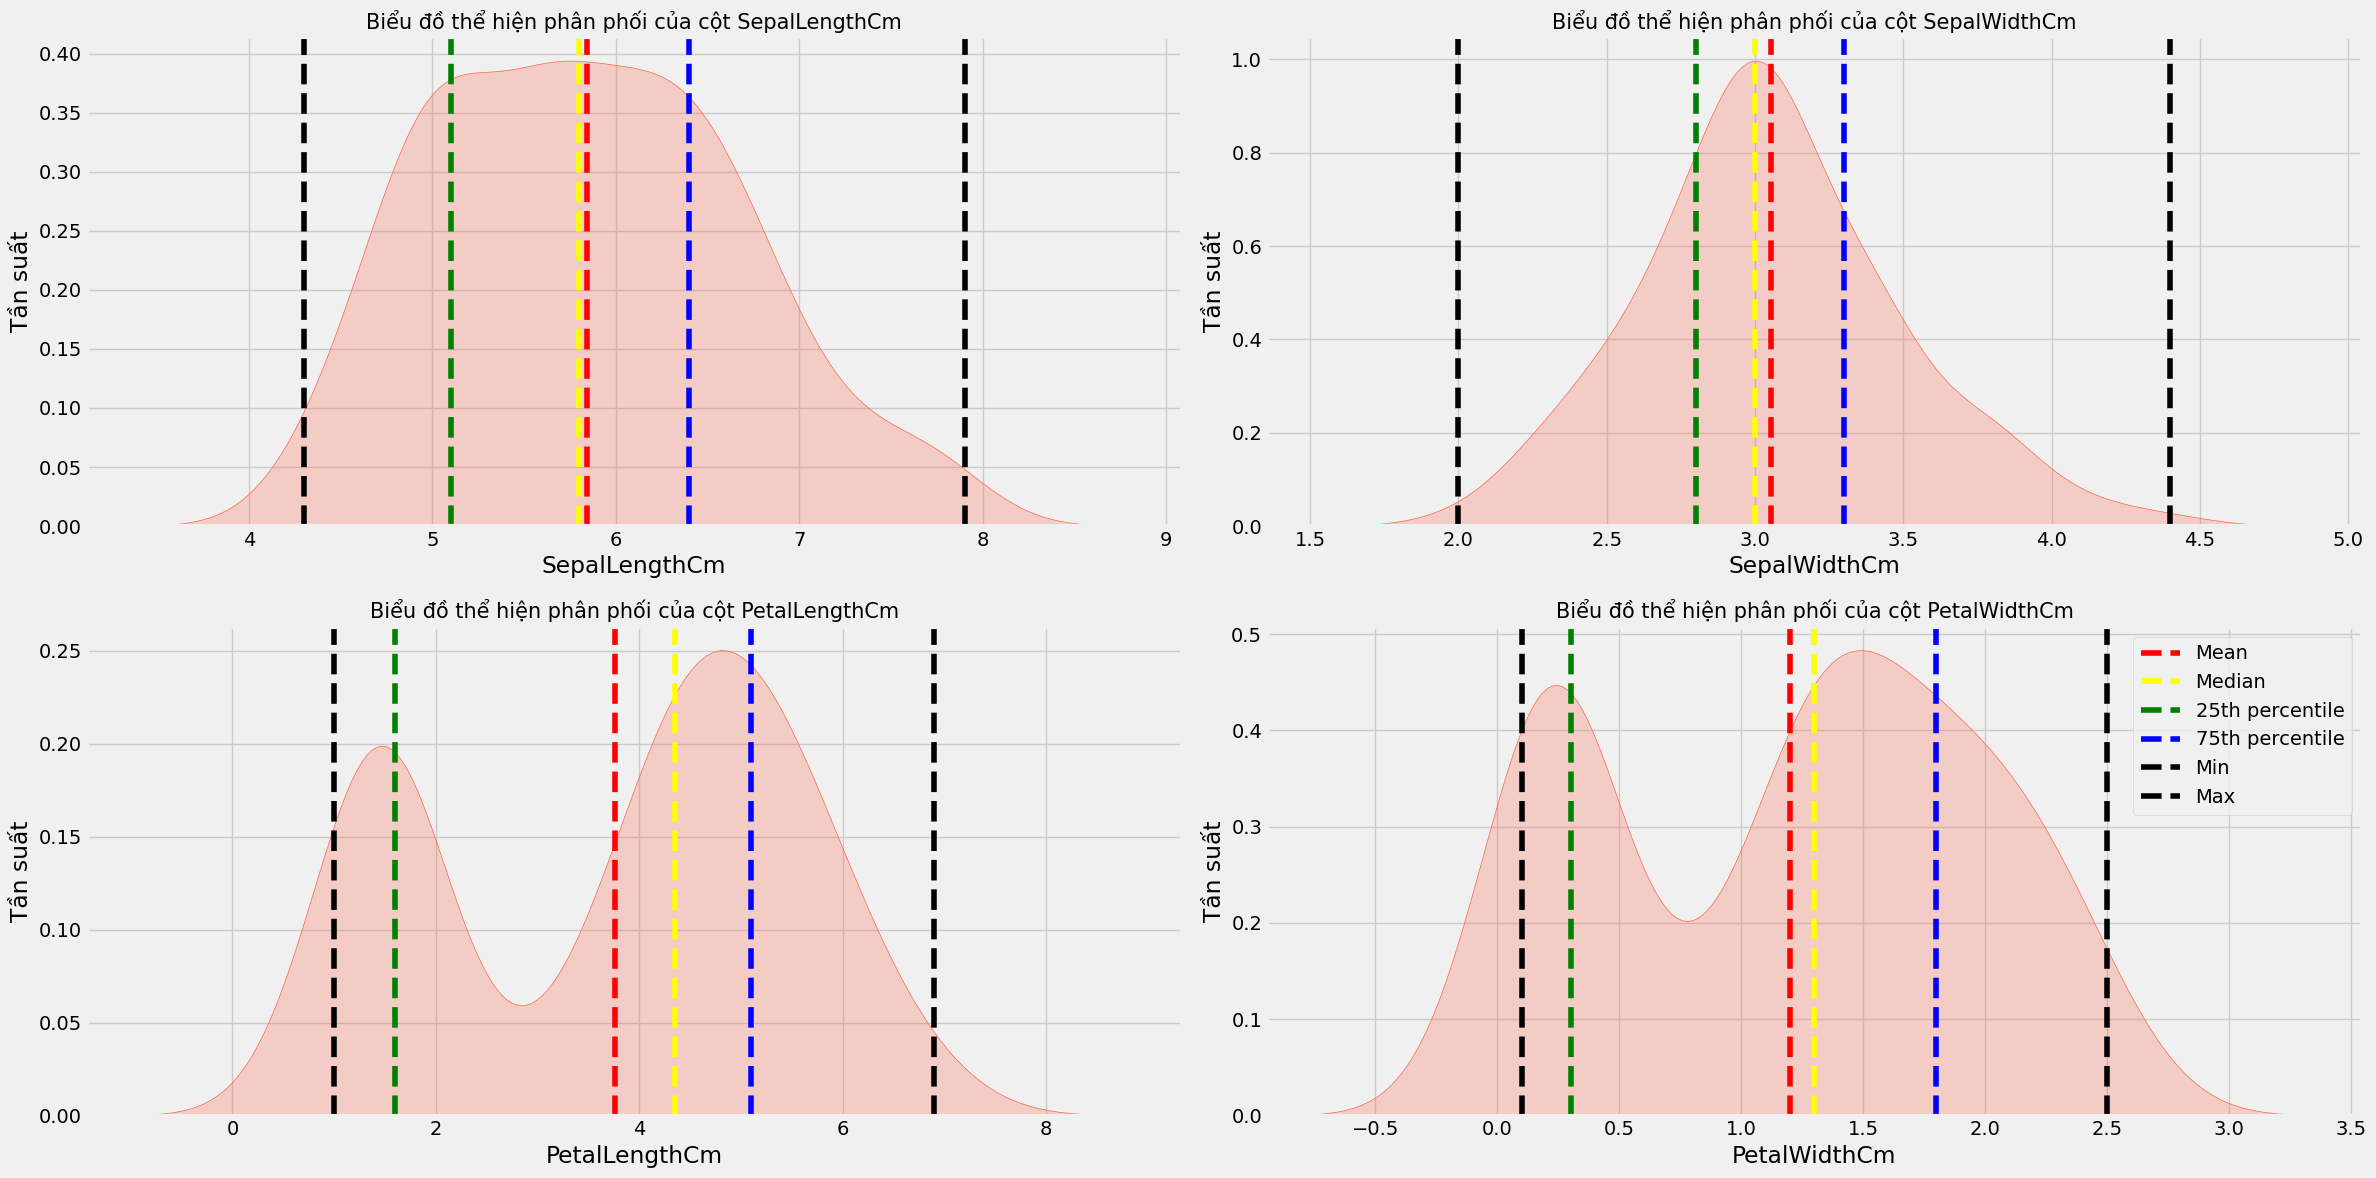

In [12]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
fig, axes = plt.subplots(2, 2, figsize=(24, 12))

for col, ax in zip(cols, axes.flatten()):
    sns.kdeplot(df[col], ax=ax, color='tomato', fill=True)
    ax.set_title(f'Biểu đồ thể hiện phân phối của cột {col}', fontsize=15)
    ax.set_xlabel(col)
    ax.set_ylabel('Tần suất')
    # tính toán các giá trị thống kê
    mean_val = df[col].mean()
    median_val = df[col].median()
    percentile_25 = df[col].quantile(0.25)
    percentile_75 = df[col].quantile(0.75)
    min_val = df[col].min()
    max_val = df[col].max()
    # hiển thị các giá trị thống kê
    ax.axvline(mean_val, color='red', linestyle='--', label='Mean')
    ax.axvline(median_val, color='yellow', linestyle='--', label='Median')
    ax.axvline(percentile_25, color='green', linestyle='--', label='25th percentile')
    ax.axvline(percentile_75, color='blue', linestyle='--', label='75th percentile')
    ax.axvline(min_val, color='black', linestyle='--', label='Min')
    ax.axvline(max_val, color='black', linestyle='--', label='Max')

plt.legend()
plt.tight_layout()
plt.show()

Nhận xét:
- Quan sát biểu đồ, ta thấy biểu đồ của `SepalLengthCm` và `SepalWidthCm` đều có dạng giống hình chuông (giống với phân phối chuẩn) và cũng không có giá trị bất thường (outlier).
- Cột `PetallengthCm` và `PetalWidthCm` lại có hình dạng phân phối đặc biệt khi có 2 peak ở 2 giá trị nhất định, có thể đây là dấu hiệu của việc dữ liệu này có thể được chia thành các nhóm khác nhau. Ta sẽ đi sâu hơn vào vấn đề này ở phần sau.

#### 5.2 Các cột `Category`

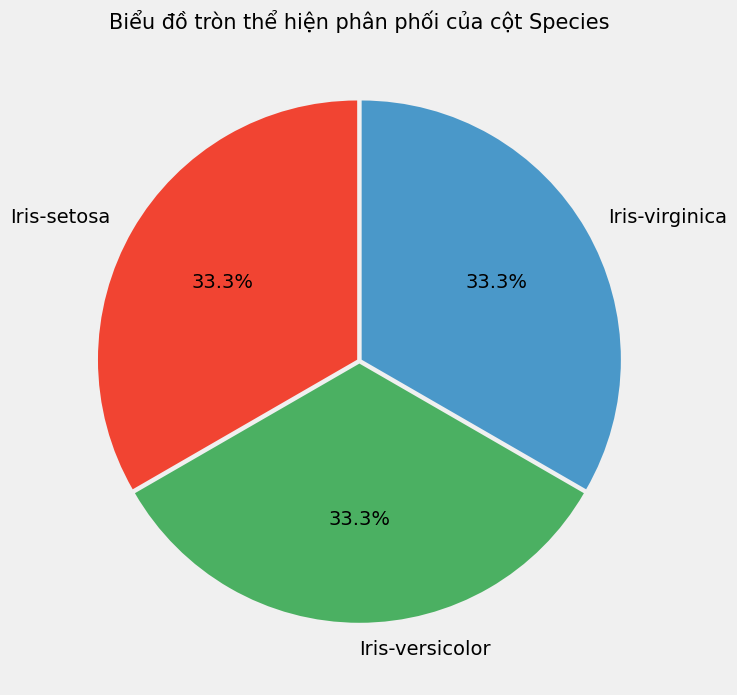

In [13]:
Reds, Greens, Blues = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues]
species = df['Species'].value_counts()

fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(species, labels=species.index, autopct='%1.1f%%', startangle=90, colors=[Reds(0.6), Greens(0.6), Blues(0.6)], explode=[0.01, 0.01, 0.01])
ax.set_title('Biểu đồ tròn thể hiện phân phối của cột Species', fontsize=15)
plt.show()

Nhận xét:
- Cột `Species` chỉ có 3 giá trị: `Iris-setosa`, `Iris-versicolor`, `Iris-virginica` và số lượng các giá trị này cũng được phân bố đồng đều (50 dòng cho mỗi loại) điều này cho thấy dữ liệu không bị mất cân bằng giữa các loại cũng như sẽ giúp cho các mô hình học máy phân loại hoạt động tốt và chính xác hơn nếu được huấn luyện trên dữ liệu này.

## 6. Phân tích dữ liệu (EDA) 🔍

#### 6.1. Ở mỗi loài hoa `Iris` có sự giống nhau hay khác nhau về kích thước đài hoa?

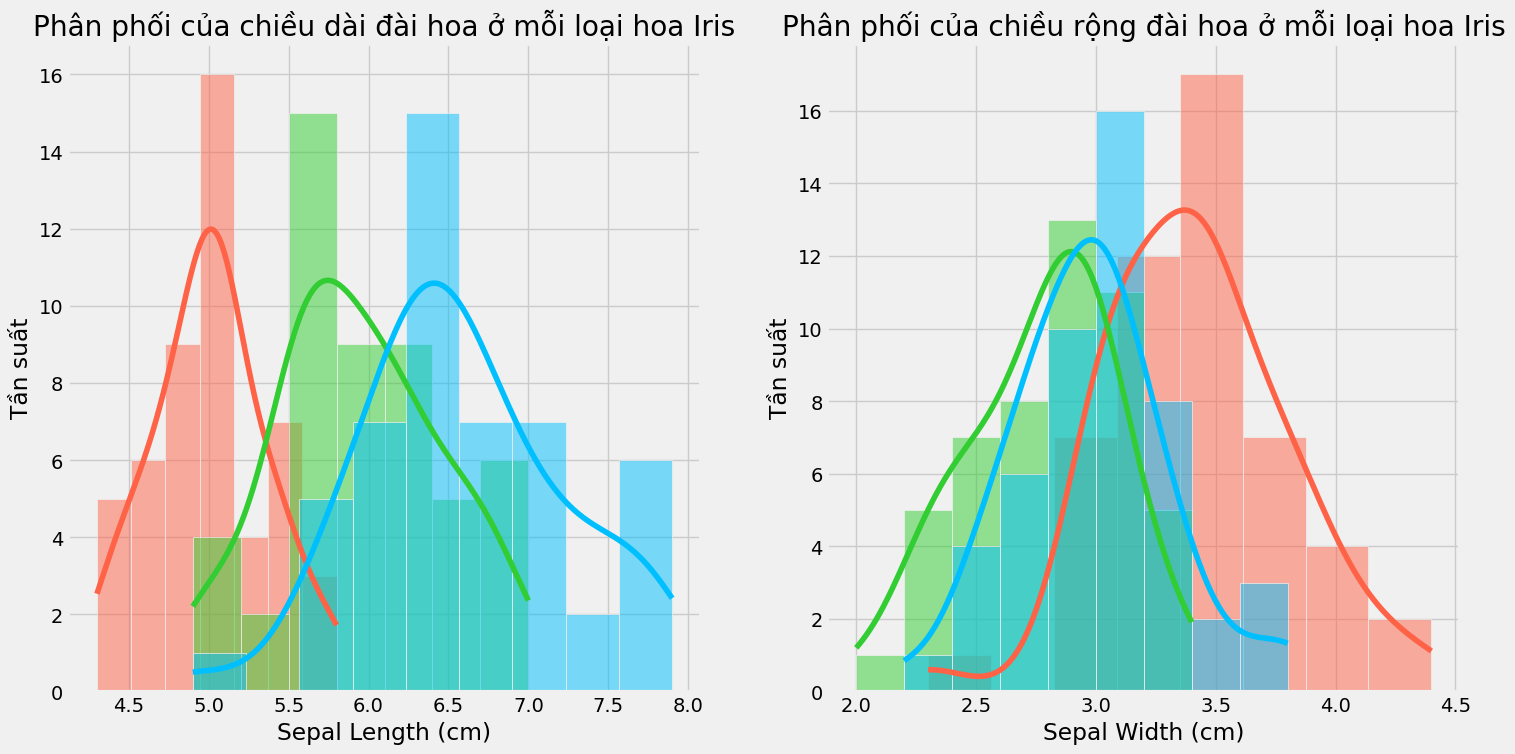

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Biểu đồ histogram
sns.histplot(df[df['Species'] == 'Iris-setosa']['SepalLengthCm'], kde=True, ax=axes[0], label='setosa', color='tomato', alpha=0.5)
sns.histplot(df[df['Species'] == 'Iris-versicolor']['SepalLengthCm'], kde=True,ax=axes[0], label='versicolor', color='limegreen', alpha=0.5)
sns.histplot(df[df['Species'] == 'Iris-virginica']['SepalLengthCm'], kde=True, ax=axes[0], label='virginica', color='deepskyblue', alpha=0.5)

sns.histplot(df[df['Species'] == 'Iris-setosa']['SepalWidthCm'], kde=True, ax=axes[1], label='setosa', color='tomato', alpha=0.5)
sns.histplot(df[df['Species'] == 'Iris-versicolor']['SepalWidthCm'], kde=True,ax=axes[1], label='versicolor', color='limegreen', alpha=0.5)
sns.histplot(df[df['Species'] == 'Iris-virginica']['SepalWidthCm'], kde=True, ax=axes[1], label='virginica', color='deepskyblue', alpha=0.5)

# Thiết lập tiêu đề và trục
axes[0].set_title('Phân phối của chiều dài đài hoa ở mỗi loại hoa Iris')
axes[0].set_xlabel('Sepal Length (cm)')
axes[0].set_ylabel('Tần suất')

axes[1].set_title('Phân phối của chiều rộng đài hoa ở mỗi loại hoa Iris')
axes[1].set_xlabel('Sepal Width (cm)')
axes[1].set_ylabel('Tần suất')


# Hiển thị biểu đồ
plt.show()

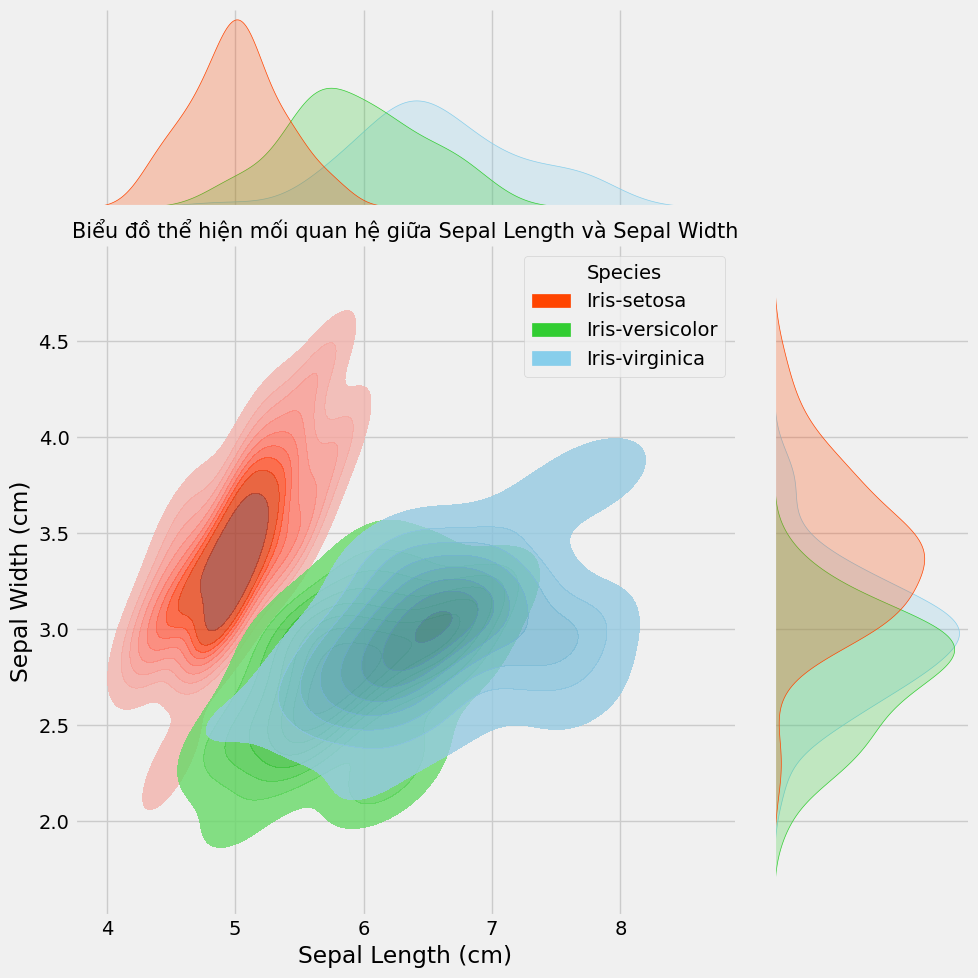

In [15]:
g = sns.jointplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette=custom_palette, kind='kde', fill=True, height=10, ratio=3, alpha=0.8)
g.set_axis_labels('Sepal Length (cm)', 'Sepal Width (cm)')

plt.title('Biểu đồ thể hiện mối quan hệ giữa Sepal Length và Sepal Width', fontsize=15)
plt.show()

Nhận xét:
- Từ các biểu đồ trên, ta có thể thấy rằng `Iris-setosa` có chiều dài đài hoa nhỏ nhất trong ba loài. Tuy nhiên thì `Iris-setosa` lại có chiều rộng đài hoa lớn nhất trong ba loài. Đây là điều thú vị và đáng chú ý ở loài hoa này.
- `Iris-versicolor` và `Iris-virginica` có kích thước đài hoa gần tương đương nhau, bằng chứng là ở  cả `bar plot` biểu đồ thể hiện phân phối mật độ của 2 loài này đêu có phần lớn diện tích bị trùng lên nhau tương đối nhiều
- Tuy nhiên nhìn chung thì loài `Iris-virginica` vẫn có một số cá thể có kích thước đài hoa lớn hơn so với đài hoa của các cá thể loài `Iris-versicolor`.

#### 6.2. Ở mỗi loài hoa `Iris` có sự giống nhau hay khác nhau về kích thước cánh hoa?

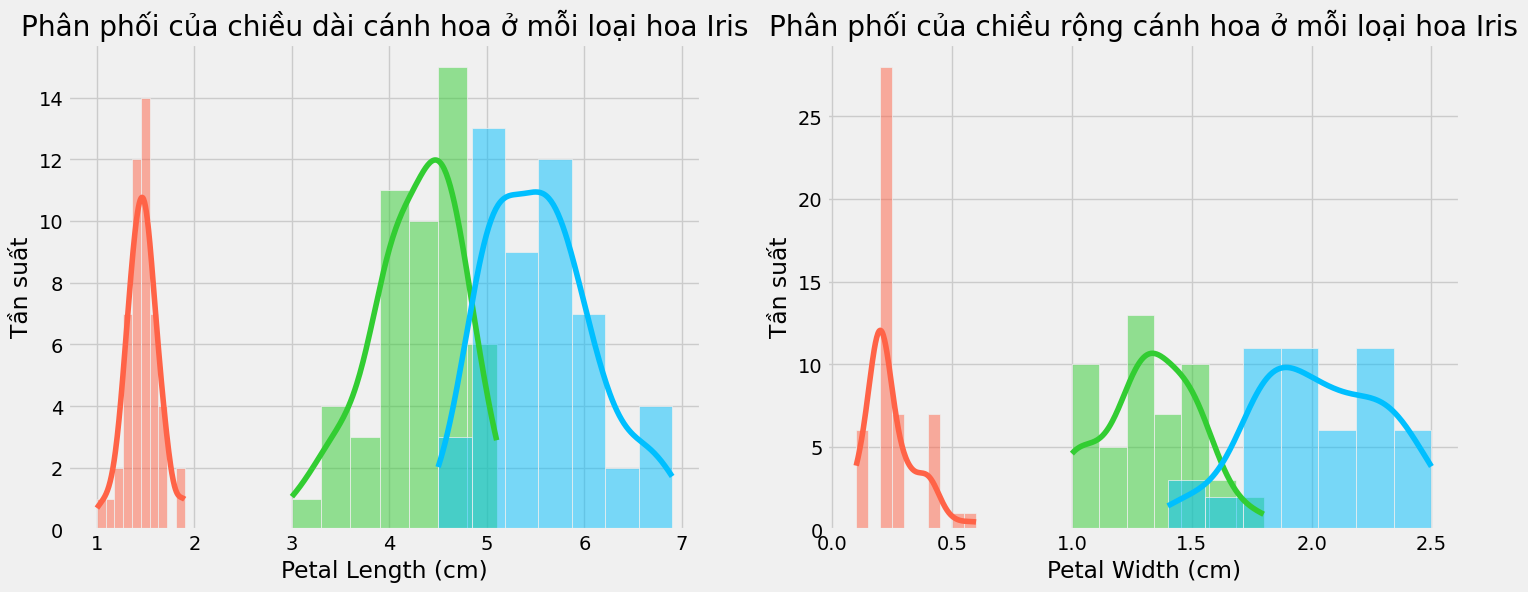

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ histogram
sns.histplot(df[df['Species'] == 'Iris-setosa']['PetalLengthCm'], kde=True, ax=axes[0], label='setosa', color='tomato', alpha=0.5)
sns.histplot(df[df['Species'] == 'Iris-versicolor']['PetalLengthCm'], kde=True,ax=axes[0], label='versicolor', color='limegreen', alpha=0.5)
sns.histplot(df[df['Species'] == 'Iris-virginica']['PetalLengthCm'], kde=True, ax=axes[0], label='virginica', color='deepskyblue', alpha=0.5)

sns.histplot(df[df['Species'] == 'Iris-setosa']['PetalWidthCm'], kde=True, ax=axes[1], label='setosa', color='tomato', alpha=0.5)
sns.histplot(df[df['Species'] == 'Iris-versicolor']['PetalWidthCm'], kde=True,ax=axes[1], label='versicolor', color='limegreen', alpha=0.5)
sns.histplot(df[df['Species'] == 'Iris-virginica']['PetalWidthCm'], kde=True, ax=axes[1], label='virginica', color='deepskyblue', alpha=0.5)

# Thiết lập tiêu đề và trục
axes[0].set_title('Phân phối của chiều dài cánh hoa ở mỗi loại hoa Iris')
axes[0].set_xlabel('Petal Length (cm)')
axes[0].set_ylabel('Tần suất')

axes[1].set_title('Phân phối của chiều rộng cánh hoa ở mỗi loại hoa Iris')
axes[1].set_xlabel('Petal Width (cm)')
axes[1].set_ylabel('Tần suất')


# Hiển thị biểu đồ
plt.show()

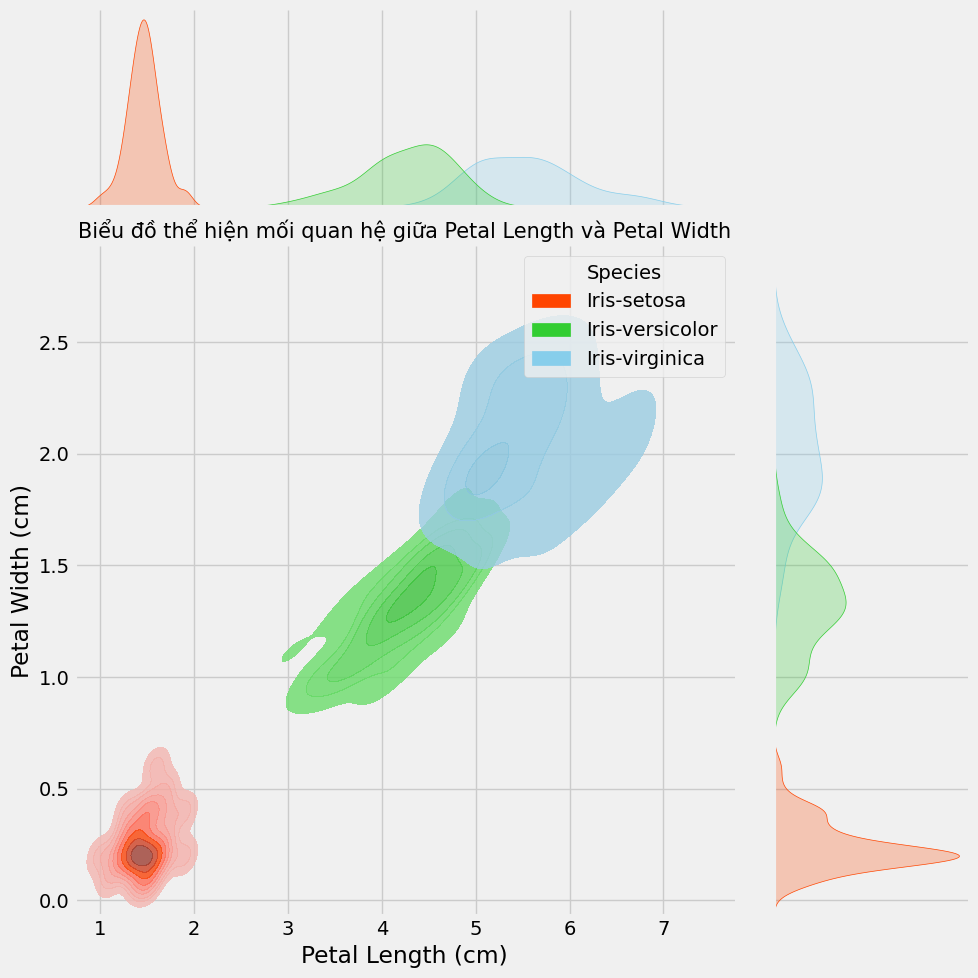

In [17]:
g = sns.jointplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', palette=custom_palette, kind='kde', fill=True, height=10, ratio=3, alpha=0.8)
g.set_axis_labels('Petal Length (cm)', 'Petal Width (cm)')


plt.title('Biểu đồ thể hiện mối quan hệ giữa Petal Length và Petal Width', fontsize=15)
plt.show()

Nhận xét:
- Không giống như đài hoa, kích thước cánh hoa ở 3 loài gần như có sự khác biệt tương đối rỏ ràng ở cả chiều dài và chiều rộng.
- `Iris-setosa` có kích thước cánh hoa nhỏ nhất trong ba loài.
- `Iris-versicolor` có kích thước cánh hoa vừa phải, không quá lớn cũng không quá nhỏ, vẫn có một số cá thể có kích thước cánh hoa lớn tương đương so với loài `Iris-virginica` tuy nhiên không quá nhiều như ở đài hoa.
- Cuối cùng `Iris-virginica` là loài có kích thước cánh hoa lớn nhất trong ba loài.

#### 6.3. Mối tương quan giữa chiều dài đài hoa với chiều rộng đài hoa ở từng loại hoa `Iris`?

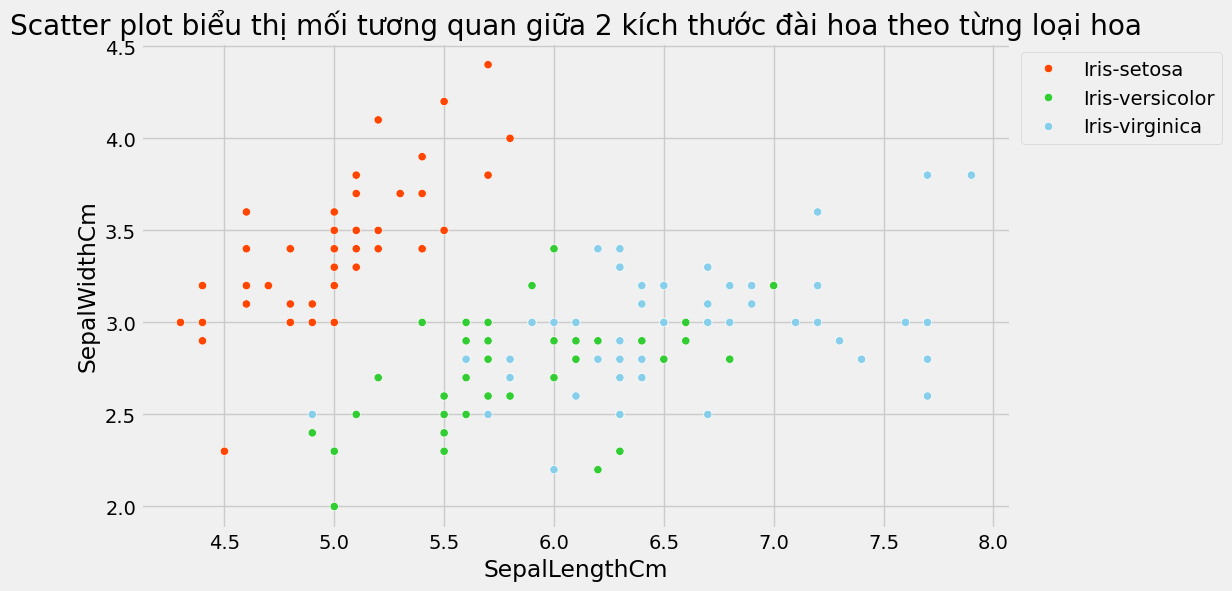

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
# Scatter plot
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette=custom_palette, ax=ax)

plt.legend(bbox_to_anchor=(1,1), loc=2)
plt.title('Scatter plot biểu thị mối tương quan giữa 2 kích thước đài hoa theo từng loại hoa')
plt.show()

Nhận xét:
- Quan sát `scatter plot` ta thấy rằng ở chiều dài và chiều rộng đài hoa của `Iris-setosa` có mối tương quan dương tương đối cao, cụ thể là nếu chiều dài đài hoa tăng thì chiều rộng đài hoa cũng tăng theo ở loài này.
- Tuy nhiên ở `Iris-versicolor` và `Iris-virginica` thì mối tương quan này không rõ ràng bằng loài `Iris-setosa`, có thể thấy rằng ở 2 loài này có một số cá thể có chiều dài đài hoa lớn nhưng chiều rộng đài hoa lại nhỏ hơn so với một số cá thể khác có chiều dài đài hoa ngắn hơn.

#### 6.4. Mối tương quan giữa chiều dài cánh hoa với chiều rộng cánh hoa ở từng loại hoa `Iris`?

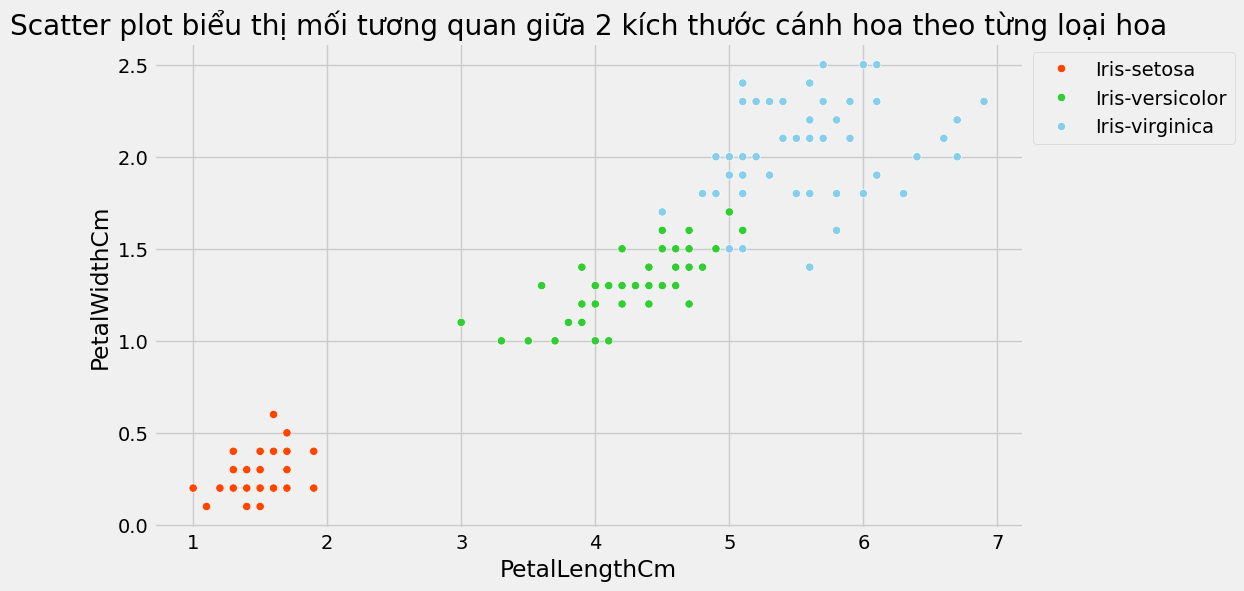

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
# Scatter plot
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', palette=custom_palette, ax=ax)

plt.legend(bbox_to_anchor=(1,1), loc=2)
plt.title('Scatter plot biểu thị mối tương quan giữa 2 kích thước cánh hoa theo từng loại hoa')
plt.show()

Nhận xét:
- Khác với đài hoa, ở cánh hoa thì mối tương quan giữa chiều dài và chiều rộng lại rỏ ràng hơn rất nhiều ở cả 3 loài. Tuy nhiên ở loài `Iris-setosa` thì mối quan hệ này lại không rõ ràng bằng 2 loài còn lại.
- Chiều dài và chiều rộng cánh hoa có mối quan hệ tương quan dương với nhau. Cụ thể là nếu chiều dài cánh hoa tăng thì chiều rộng cánh hoa cũng tăng theo.

#### 6.5. Mối quan hệ tương quan giữa các kích thước của đài hoa và cánh hoa ở từng loại hoa `Iris`?

- `Iris-setosa`

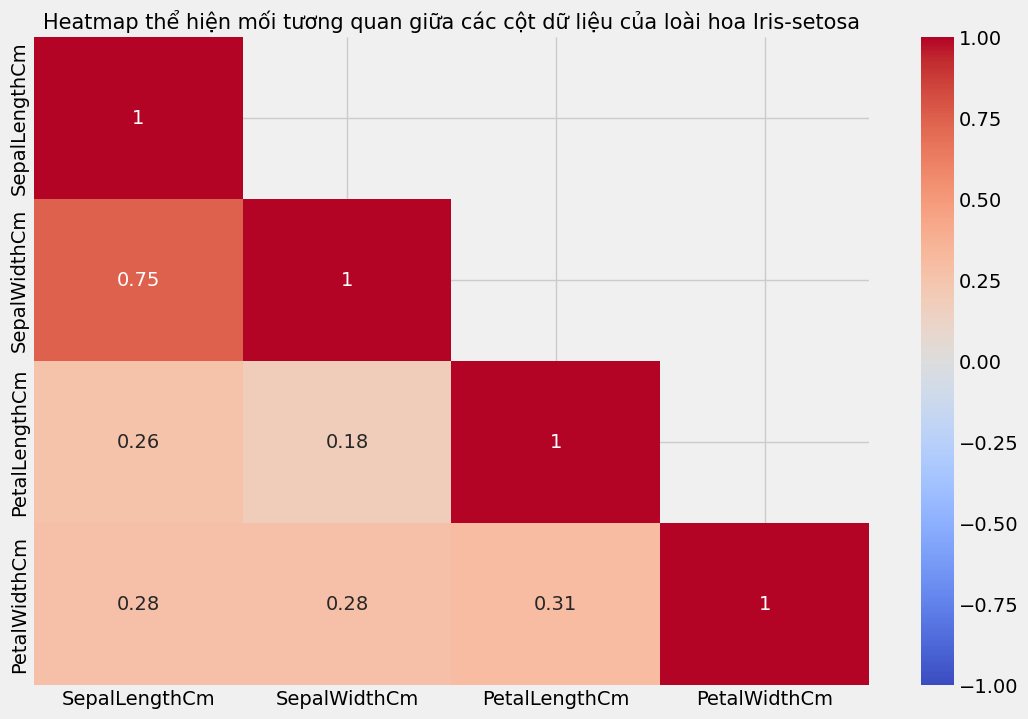

In [20]:
setosa_df = df[df['Species'] == 'Iris-setosa']
corr = setosa_df.drop(['Species'], axis=1).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap="coolwarm", mask=np.triu(corr, k=1), vmax=1, vmin=-1)
plt.title('Heatmap thể hiện mối tương quan giữa các cột dữ liệu của loài hoa Iris-setosa', fontsize=15)
plt.show()

- `Iris-versicolor`

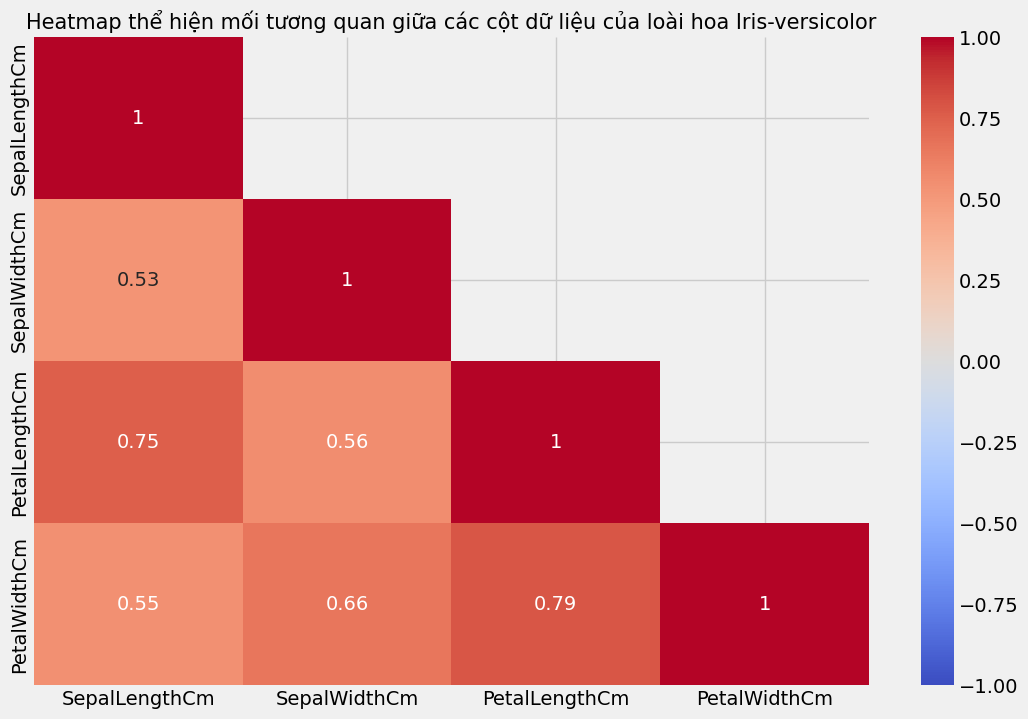

In [21]:
versicolor_df = df[df['Species'] == 'Iris-versicolor']
corr = versicolor_df.drop(['Species'], axis=1).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap="coolwarm", mask=np.triu(corr, k=1), vmax=1, vmin=-1)
plt.title('Heatmap thể hiện mối tương quan giữa các cột dữ liệu của loài hoa Iris-versicolor', fontsize=15)
plt.show()

- `Iris-virginica`

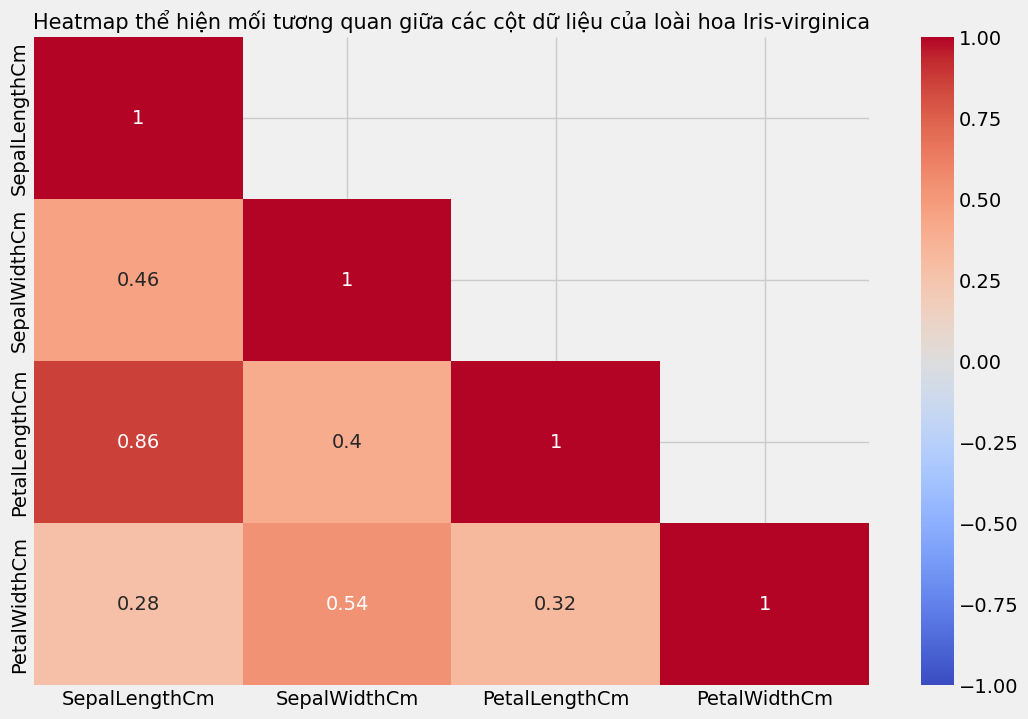

In [22]:
virginica_df = df[df['Species'] == 'Iris-virginica']
corr = virginica_df.drop(['Species'], axis=1).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap="coolwarm", mask=np.triu(corr, k=1), vmax=1, vmin=-1)
plt.title('Heatmap thể hiện mối tương quan giữa các cột dữ liệu của loài hoa Iris-virginica', fontsize=15)
plt.show()

- Xét cho cả 3 loài hoa `Iris`

<Figure size 2000x600 with 0 Axes>

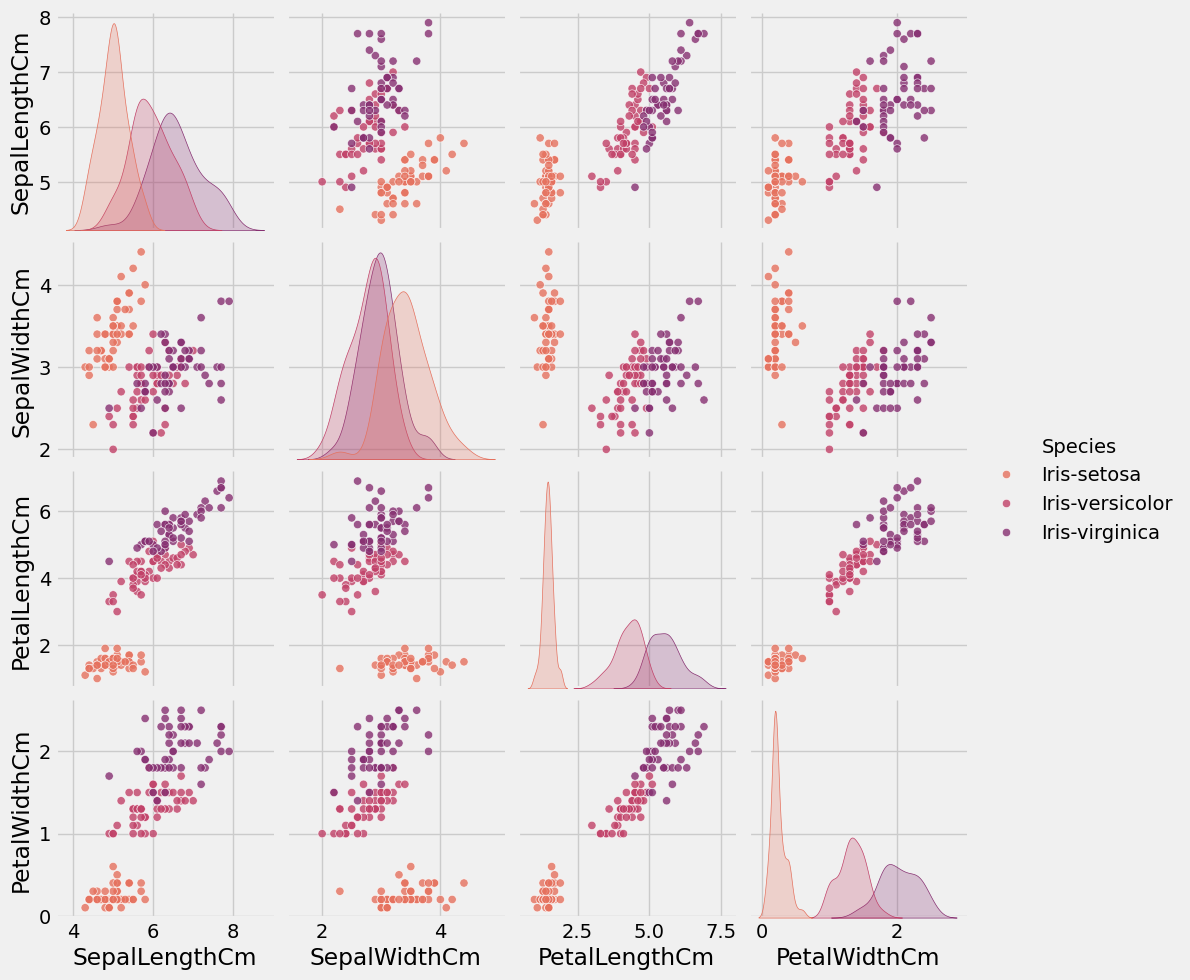

In [23]:
plt.figure(figsize=(20,6))
sns.pairplot(data=df, hue='Species', palette='flare', plot_kws={'alpha': 0.8})
plt.show()

Nhận xét:
- Từ các biểu đồ trên, ta thấy rằng các kích thước đài hoa và cánh hoa của cả 3 loài hoa `Iris` đều có mối tương quan dương với nhau, không có xuất hiện tương quan âm giữa 2 thuộc tính ở bất kì loài nào.
- `Iris-setosa`:
    - Chiều dài và chiều rộng đài hoa của loài này có mối tương quan dương mạnh mẽ nhất trong 3 loài.
    - Chiều dài và chiều rộng cánh hoa của chúng có quan hệ tương quan dương nhưng không rõ ràng bằng đài hoa.
    - Ngoài ra các kích thước đài hoa và cánh hoa của Iris-setosa cũng không có mối tương quan cao với nhau.
- `Iris-versicolor`:
    - Chiều dài và chiều rộng cánh hoa của loài này có mối tương quan dương tốt nhất trong ba loài.
    - Ngoài ra chiều dài đài hoa và chiều dài cánh hoa của Iris-versicolor lại có chỉ số tương quan dương với nhau tương đối cao: `0.75`.
- `Iris-virginica`:
    - Đây là loài hoa thú vị nhất trong ba loài vì chỉ số tương quan giữa 2 kích thước đài hoa của loài này lại không cao, điều tương tự cũng xảy ra ở 2 kích thước cánh hoa.
    - Tuy nhiên, chiều dài cánh hoa và chiều dài đài hoa của loài này lại có mối tương quan dương cao nhất trong 3 loài. Đây là một phát hiện thú vị và đáng để chú ý chứng tỏ rằng loài hoa này thì chiều dài đài hoa sẽ tăng theo chiều dài cánh hoa và ngược lại.

#### 6.6. So sánh kích thước trung bình của đài hoa và cánh hoa ở từng loại hoa `Iris`?

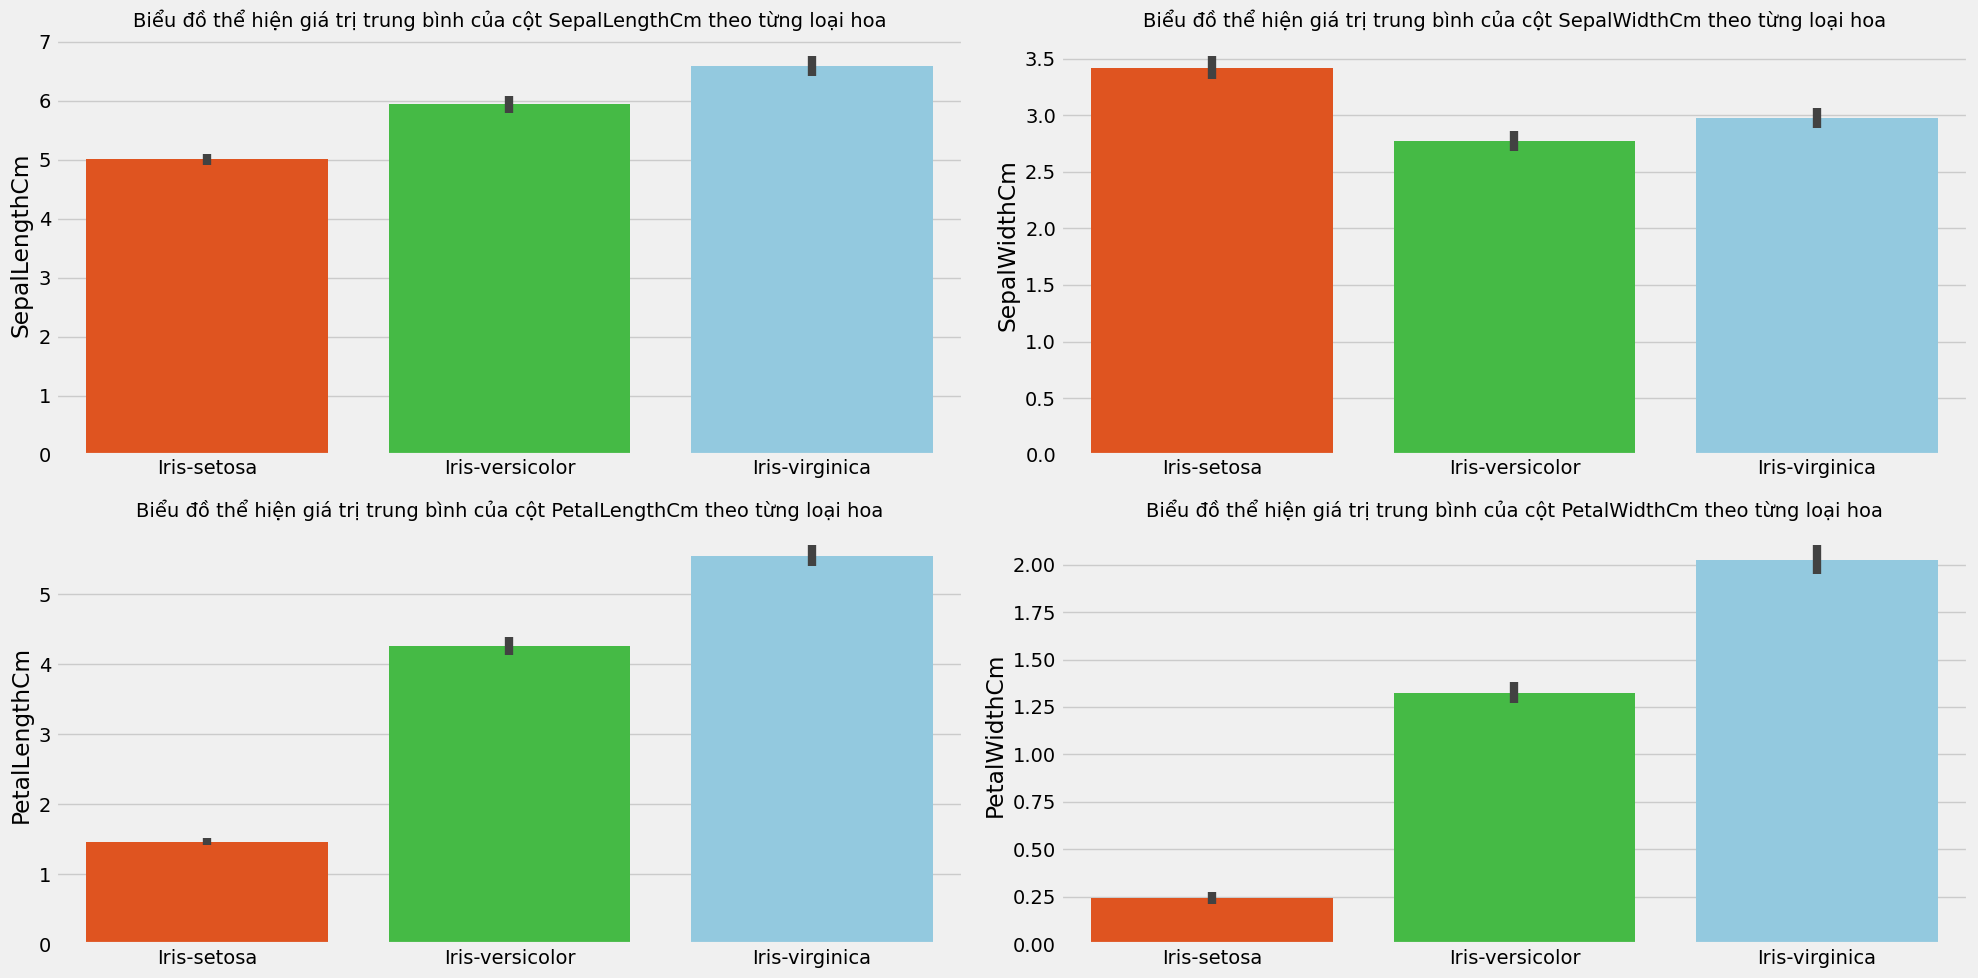

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
for col, axe in zip(cols, axes.flatten()):
    sns.barplot(data=df, x='Species', y=col, ax=axe, palette=custom_palette)
    axe.set_title(f'Biểu đồ thể hiện giá trị trung bình của cột {col} theo từng loại hoa', fontsize=14)
    axe.set_ylabel(col)
    axe.set_xlabel('')

plt.tight_layout()
plt.show()

Nhận xét:
- Xét theo cánh hoa thì loài `Iris-virginica` có kích thước trung bình lớn nhất ở cả chiều dài và chiều rộng, tiếp theo là `Iris-versicolor` và cuối cùng là `Iris-setosa`.
- Ở đài hoa thì có một sự thú vị là loài `Iris-setosa` tuy có chiều dài đài hoa nhỏ nhất nhưng lại có chiều rộng đài hoa lớn nhất trong ba loài. Điều này cho thấy rằng loài này có thể có hình dáng đài hoa đặc biệt so với 2 loài còn lại.
- `Iris-virginica` vẫn là loài có chiều dài đài hoa lớn nhất nhưng chiều rộng đài hoa lại nhỏ hơn so với `Iris-setosa`. 
- `Iris-versicolor` là loài hoa có kích thước đài hoa lẫn cánh hoa vừa phải, không quá lớn cũng không quá nhỏ, nằm ở giữa giữa so với 2 loài còn lại.

## 7. Kết luận 📝
Qua quá trình phân tích dữ liệu, ta có thể rút ra được một số kết luận quan trọng để từ đó hiểu hơn về từ tập dữ liệu `Iris`:
- Dữ liệu không có dòng dữ liệu nào bị lặp và không có cột nào chứa giá trị rỗng.
- Dữ liệu trong các cột `SepalLengthCm`, `SepalWidthCm`, `PetalLengthCm`, `PetalWidthCm` đều là dạng số thực. Dựa vào `box plot` ta thấy không có quá nhiều giá trị bất thường (outlier) trong các cột này nên ta có thể chấp nhận được và không cần phải xử lí hoặc loại bỏ chúng.
- Cột `Species` có dạng categorical với đúng 3 giá trị: `Iris-setosa`, `Iris-versicolor`, `Iris-virginica`.
- Mối tương quan giữa các kích thước của đài hoa và cánh hoa ở cả ba loài đều là dương, không có xuất hiện mối tương quan âm nào. Tuy nhiên tùy vào từng loài mà các mối tương quan này có thể mạnh hoặc yếu khác nhau chứ không phải lúc nào cũng giống nhau.
- Loài `Iris-virginica` là loài có kích thước đài hoa lẫn cánh hoa lớn nhất trong ba loài, tiếp theo là `Iris-versicolor` và cuối cùng là `Iris-setosa`.
- Có một phát hiện thú vị là loài `Iris-setosa` tuy có kích thước cánh hoa và chiều dài đài hoa nhỏ nhất nhưng lại có chiều rộng đài hoa lớn nhất trong ba loài.
